Please note September 19th entery in [LFETS Meating Notes](https://docs.google.com/document/d/1l_8dlIdJznsHb7cQ9t38HIvYR_ec9fbx6pr6vHvQvJs/edit?usp=sharing)




Numbers:
- Mixture ratio 1.2-1.4 approx. 1.3 O/F [Rocket Moonlighting](http://www.rocketmoonlighting.com/projects/pr56-igniter)
- Thrust 1.1 lbsf - Taken from [Roberts](http://www.watzlavick.com/robert/rocket/news/2011.html) rocket Project
- Bob's injector mass flow rate is $0.008 \frac{lb}{sec}$
- Chamber pressure 135 psig (NTM)

See Huzel & Huang for

Mass Flow Rate:
*$\dot{m}\approx0.005\dot{m}_{main}$  (Pg 9, 140)

LFRE Design documentation: 
- Mass flow rate $ \dot{m} = 2.06 \frac{lbm}{s}$
 - $\therefore \ \ \dot{m}_{igniter} = (2.06 * .005)\frac{lbm}{s} = 0.0103 \frac{lbm}{s} $


Exit Velocity:
$V_{e} = \sqrt{\frac{2g\gamma}{\gamma-1}RT_{c_{ns}}\bigg[1-\bigg(\frac{P_{e}}{P_{c_{ns}}}\bigg)\bigg]^\frac{\gamma-1}{\gamma}} $  (HH Pg. 9)


*Note that $\dot{w}$ is split between propellants based on mixture ratio

References:

(HH)
- Modern Engineering for Design of Liquid-Propellant Rocket Engines, Huzel & Huang

(NTM)
- NASA Technical Memorandum 106493 - Hydrogen-Oxygen Torch Igniter




# Data Used for calculations

[Isopropanol](http://www.chemicalbook.com/ChemicalProductProperty_EN_CB8854102.htm) density $\rho_{ipa} = 786 \frac{kg}{m^3} \ \rightarrow \ 49.068 \frac{lbm}{ft^3} $

Water density $ = \rho _{h20} = 62.3 \frac{lbm}{ft^3}$

$\dot{m}_{igniter} = 0.0103 \frac{lbm}{s} $

Chamber pressure $ = 135 \ psig $


In [128]:
import math
from mpmath import *

#Define Constants
g     = 32.2  # gravitational constant in ft/s^2

#initial inputs
rho_ipa  = 49.068    # Density of IPA in (lbm/ft^3)
rho_h2O  = 62.30     # Density of water in (lbm/ft^3)
rho_O2   = 0.0831     # Density of Liquid Oxygen in (lbm/ft^3)
ofr     = 0.9       # Engine oxygen flow rate in (lbm/s)
ffr     = 1.16      # Engine Fuel flow rate in (lbm/s)
igff    = .005      # percent of main engine flow %
mdot    = 0.0103    # Mass flow rate ing (lbm/s)
icp     = 135       # Igniter Chamber pressure (psi)
tube1_8 = 0.125     # 1/8th in Tube diameter (in)
GOXsos  = 1067.55   #Speed of sound in GOX in (ft/sec) 


# initial calculated values for equations:

mdot_O = igff * ofr   # Oxygen mass flow rate into igniter (lbm/s)s
mdot_F = igff * ffr   # Fuel mass flow rate into igniter (lbm/s)
rho_f = (.3 * rho_h2O) + (.7 * rho_ipa) # density of Fuel in lbm/ft^3
of = ofr / ffr # O/F ratio
area1_8 = (tube1_8 /24)**2 * pi() # in ft^2 
vFuel = mdot_F / (rho_f * area1_8) #Fuel flow velocity (ft/s)
vGOX = mdot_O / (rho_O2 *area1_8) #GOX flow velocity
machGOX = vGOX / GOXsos #Mach # for GOX flow
sgf = rho_f / rho_h2O # specific gravity
vffr = 1 / rho_f * iffr * 60 #convert to per min, units of ft^3 / min
qgpm = vffr * 7.48052 # convert ft^3 to US Gallons

print("70 percent IPA Fuel density,   rho_f   = %.2f lbm/ft^3" % rho_f)
print("Fuel Specific Gravity,         sgf     = %.2f " %sgf)
print("Oxygen Fuel Ratio O/F,         of      = %.2f " % of)
print("Total Igniter mass flow rate,  mdot    = %.4f lbm/sec" % mdot)
print("Igniter Fuel mass flow rate,   mdot_F  = %.4f lbm/sec" % mdot_F)
print("Igniter Oxygen mass flow rate, mdot_O  = %.4f lbm/sec" % mdot_O)
print("Igniter Chamber Pressure,      icp     = %.2f psig" % icp)
print("1/8th in tube Flow Area        area1_8 = %.2e ft^2" % area1_8)
print("Fuel Flow Velocity,            vFuel   = %.2f ft/sec" % vFuel)
print("GOX Flow Velocity,             vGOX    = %.2f ft/sec" % vGOX)
print("GOX Mach number,               machGOX = %.2f " % machGOX )
print("Fuel flow rate in gpm          qgpm    = %.4f gpm" %qgpm)


70 percent IPA Fuel density,   rho_f   = 53.04 lbm/ft^3
Fuel Specific Gravity,         sgf     = 0.85 
Oxygen Fuel Ratio O/F,         of      = 0.78 
Total Igniter mass flow rate,  mdot    = 0.0103 lbm/sec
Igniter Fuel mass flow rate,   mdot_F  = 0.0058 lbm/sec
Igniter Oxygen mass flow rate, mdot_O  = 0.0045 lbm/sec
Igniter Chamber Pressure,      icp     = 135.00 psig
1/8th in tube Flow Area        area1_8 = 8.52e-05 ft^2
Fuel Flow Velocity,            vFuel   = 1.28 ft/sec
GOX Flow Velocity,             vGOX    = 635.42 ft/sec
GOX Mach number,               machGOX = 0.60 
Fuel flow rate in gpm          qgpm    = 0.0491 gpm


## Pressure Drop

### Governing equations:

$P_1 = P_2 + \gamma z_2 + \frac{1}{2}\rho(V^2_2 -V^2_1)+\gamma h_L$

$\Delta P = \frac{(\dot{m} \ / \ A \ C_D)}{\rho} $

### Assumptions for igniter calculations:

Incompressible flows (possibly will need to adjust this assumption for GOX line)

Zero elevation change, so pressure head can be neglected $\therefore \rightarrow \gamma z_2 = 0$  

Fluid initially at rest $\therefore \rightarrow V^2_1 = 0$

Very short lenghts of tube, $\therefore$ Major Losses $= \ 0$

Minor losses $h_L = \sum K_L \frac{V^2}{2g}$ - Minor losses negligble with the exception of the fuel metering orifice.

Mass Flow Rate $\dot{m} = \rho Q = \rho AV $ units in$ \frac{[slug]}{[s]}$ or $\frac{[kg]}{[s]}$

- where $Q$ is volume flow rate in $\frac{ft^3}{s}$ or $\frac{ft^3}{s}$ 
- $\therefore \ V = \frac{\dot{m}}{\rho A}$

### Working equations:

*Where:* 

$P_{1o} =$ Oxygen inlet pressure 

$P_{1f} =$ Fuel inlet pressure 

$P_{ch} =$ Igniter Chamber pressure 

$r    =$ O/F mixure ratio

$\dot{m} =$ Igniter mass flow rate

$\dot{m}_o =$ Oxygen mass flow rate

$\dot{m}_f =$ Fuel mass flow rate

$\rho_o =$ density of GOX

$\rho_f = $ density of fuel

$A_f=A_o =$ Tube area for Fuel and Oxygen lines


## __GOX__ - *Gaseous Oxygen*

$P_{1o} = P_{ch} + \rho_o \frac{\left(\frac{r \dot{m}}{(r+1)}\frac{1}{\rho_o A_o} \right) ^2}{2}$

$\therefore \ P_{1o} = P_{ch} + \rho_o \frac{\left(\frac{\dot{m}_o}{\rho_o A_o} \right) ^2}{2}$

## __Fuel__ - *IPA*

$P_{1f} = P_{ch} + \rho_f \frac{\left(\frac{\dot{m}_f}{\rho_f A_f} \right) ^2}{2} + \frac{(\dot{m}_f \ / \ A_f \ C_D)}{\rho_f}$



Chamber Pressure = 333.50


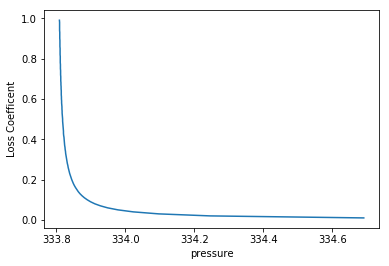

In [199]:
import sympy as sympy
#from sympy.solvers import solveset
from sympy import *
sympy.init_printing(use_unicode=False, wrap_line=True)
from matplotlib import pyplot as plt

p_1o     = Symbol('p_1o')      #oxygen inlet pressure
p_1f     = Symbol('p_1f')      #fuel inlet pressure
p_ch     = Symbol('p_ch')      #igniter chamber pressure
#mdot_O   = Symbol('mdot_O')    #Oxygen mass flow rate
#mdot_F   = Symbol('mdot_F')    #Fuel mass flow rate
#rho_O2   = Symbol('rho_O2')    #density of GOX
#rho_f    = Symbol('rho_f')     #density of fuel
#area1_8  = Symbol('area1_8')  #area of 1/8th inch tube
#C_d      = Symbol('C_d')       #Loss coefficent of fuel orifice    

p_1o = 450 #pressure in psi 

#Eq(p_ch + rho_O2*( ((mdot_O)/(rho_O2*area1_8) )**2)/2, p_1o)

p_ch = solveset(Eq((p_ch + (rho_O2*( ((mdot_O)/(rho_O2*area1_8) )**2)/2)/144), p_1o), p_ch).evalf(5)
print ("Chamber Pressure =", p_ch.args[0])

# C_d = 1
pressure = []
loss_coef =[]

for x in range(1, 100):
    C_d= x/100
    loss_coef.append(C_d)
    equation = Eq((p_ch.args[0] + \
            (rho_f*( ((mdot_F)/(rho_f*area1_8) )**2)/2)/144 + \
            (mdot_F/(area1_8*C_d))/(144*rho_f)), p_1f)
    pressure.append(solveset(equation, p_1f).evalf(5).args[0])

#print(loss_coef)
#print(pressure)

plt.plot(pressure, loss_coef)
plt.ylabel('Loss Coefficent')
plt.xlabel('pressure')
plt.show()


         

In [130]:
# Need to input the KL variables prior to solving for inlet pressure. 

#1/8 in solinoid

cv1 = 0.045        #GPM take from Valve data sheet

#Calculations
pdrop1 = sgf * (qgpm / cv1)**2

#print("Flow Rate through Solinoid 1,   Qgpm = %.4f gpm" % Qgpm)
print("Pressure drop fuel Solinoid,      pdrop1 = %.4f psi" % pdrop1)

# Attempt to find Cv for orifice

dpd = 100 # Desired pressure drop accross fuel orifice (psi)

cv0 = qgpm * sqrt(sgf/dpd)

print("Desired orifice pressure drop,    dpd    = %.0f psi" % dpd)
print("Required Cv for pressure drop,    cv0    = %.4f " % cv0)


Pressure drop fuel Solinoid,      pdrop1 = 1.0128 psi
Desired orifice pressure drop,    dpd    = 100 psi
Required Cv for pressure drop,    cv0    = 0.0045 


In [143]:
for x in range(0, 3):
    print ("We're on time %d" % (x))

We're on time 0
We're on time 1
We're on time 2
